1. Import Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Load the dataset

In [12]:
dataset=pd.read_csv(r"E:\titanic_project\tested.csv")

3. Understanding the data

In [13]:
dataset.info()  ## Check the structure and summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [14]:
dataset.describe() ## Summary statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
dataset.shape ## (418, 12)

(418, 12)

In [16]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
dataset.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
# Display the first/last 5 rows of the dataset

dataset.head(5) # dataset.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Summary Statistics

In [19]:
dataset.Age.mean() # The mean age of passengers is around 30.3 years.

30.272590361445783

In [20]:
dataset.Pclass.mean() # Most passengers are in 3rd class, with a mean Pclass of 2.27.

2.2655502392344498

In [21]:
dataset.Fare.mean() # The mean fare paid is around 35.6 units of currency.

35.627188489208635

# Data Cleaning

Data Type Conversion

In [22]:
# int to float
dataset.Age = dataset.Age.astype('float32')
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
dataset.Fare = dataset.Fare.astype('float32')
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float32
SibSp            int64
Parch            int64
Ticket          object
Fare           float32
Cabin           object
Embarked        object
dtype: object

# Missing Values

In [24]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
# Fill missing Age & Fare values with the median age
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

# Drop the Cabin column as it has too many missing values
dataset.drop('Cabin', axis=1, inplace=True)

In [26]:
dataset.isna().sum() # Now, there is no null value

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Variance

In [27]:
dataset.var() == 0

C:\Users\nidhi\AppData\Local\Temp\ipykernel_13640\1709099053.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.var() == 0


PassengerId    False
Survived       False
Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
dtype: bool

# Duplicates 

In [28]:
duplicate = dataset.duplicated()
duplicate
sum(duplicate) # there no duplicate 

0

#  Feature Engineering

In [29]:
# Create a new feature 'FamilySize'
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# FamilySize: Combining SibSp and Parch to create a new FamilySize feature is a good idea, as it can provide insight into whether traveling with family affects survival.


# Extract Title from Name
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with 'Rare'
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

dataset['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

In [30]:
# Drop unnecessary columns
dataset.drop(['Name', 'Ticket', 'PassengerId','Parch','SibSp'], axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Pclass      418 non-null    int64  
 2   Sex         418 non-null    object 
 3   Age         418 non-null    float32
 4   Fare        418 non-null    float32
 5   Embarked    418 non-null    object 
 6   FamilySize  418 non-null    int64  
 7   Title       418 non-null    object 
dtypes: float32(2), int64(3), object(3)
memory usage: 23.0+ KB


# Visualization

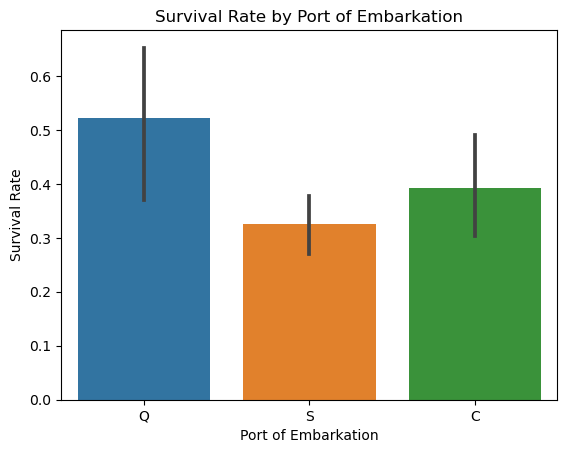

In [31]:
# Barplot for Embarked vs. Survival
sns.barplot(x='Embarked', y='Survived', data=dataset)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

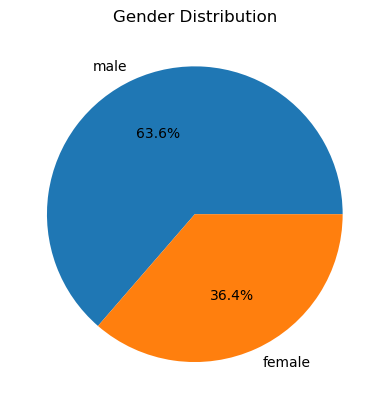

In [32]:
# Pie chart for Sex distribution
sex_counts = dataset['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

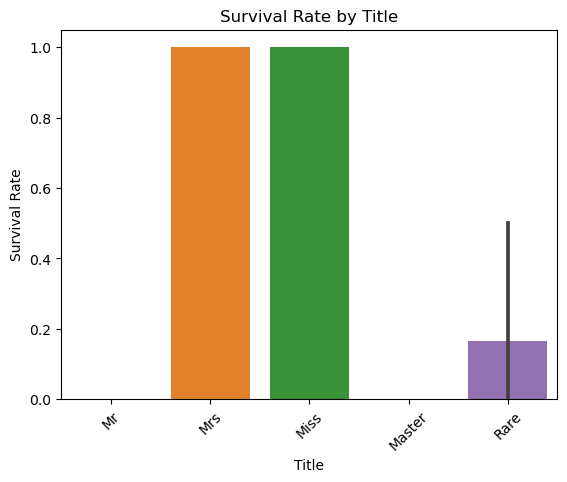

In [33]:
# Barplot for Title vs. Survival
sns.barplot(x='Title', y='Survived', data=dataset)
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Encode categorical variables
dataset = pd.get_dummies(dataset, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

In [35]:
dataset.Survived.value_counts()
dataset.Pclass.value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

# Outliers

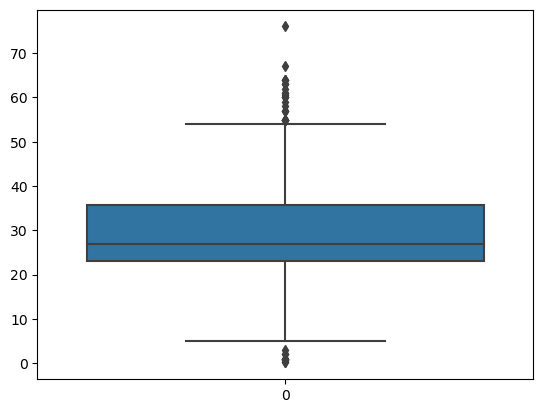

In [37]:
# Let's find outliers in Age & Fare
sns.boxplot(dataset.Age)

# Detection of outliers (find limits for Age based on IQR)
IQR = dataset['Age'].quantile(0.75) - dataset['Age'].quantile(0.25)

lower_limit = dataset['Age'].quantile(0.25) - (IQR * 1.5)
upper_limit = dataset['Age'].quantile(0.75) + (IQR * 1.5)

<Axes: >

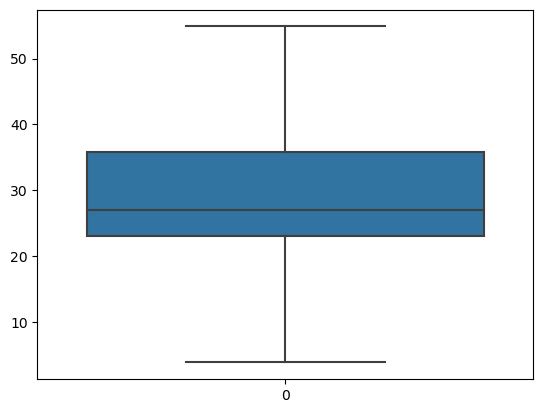

In [38]:

# Replace the outliers by the maximum and minimum limit
dataset['Age_replaced'] = pd.DataFrame(np.where(dataset['Age'] > upper_limit, upper_limit, np.where(dataset['Age'] < lower_limit, lower_limit, dataset['Age'])))
sns.boxplot(dataset.Age_replaced)

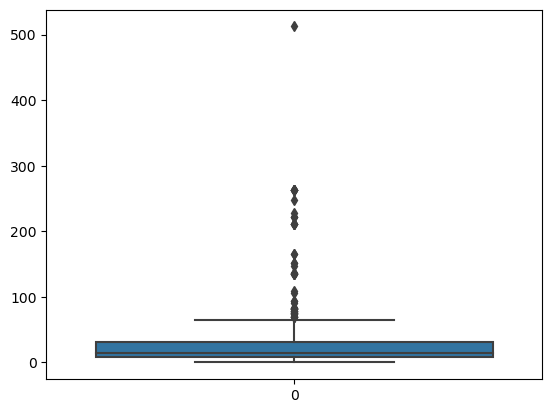

In [39]:
sns.boxplot(dataset.Fare)
# Detection of outliers (find limits for Fare based on IQR)
IQR = dataset['Fare'].quantile(0.75) - dataset['Fare'].quantile(0.25)

lower_limit1 = dataset['Fare'].quantile(0.25) - (IQR * 1.5)
upper_limit1 = dataset['Fare'].quantile(0.75) + (IQR * 1.5)

<Axes: >

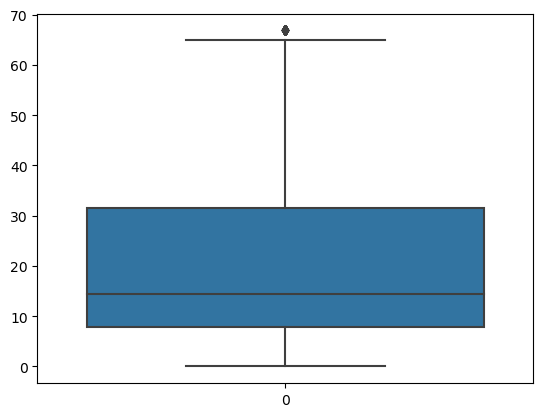

In [40]:
# Replace the outliers by the maximum and minimum limit
dataset['Fare_replaced'] = pd.DataFrame(np.where(dataset['Fare'] > upper_limit1, upper_limit1, np.where(dataset['Fare'] < lower_limit1, lower_limit1, dataset['Fare'])))
sns.boxplot(dataset.Fare_replaced)

In [41]:
# Drop unnecessary columns
dataset.drop(['Age', 'Fare'], axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   FamilySize     418 non-null    int64  
 3   Sex_male       418 non-null    uint8  
 4   Embarked_Q     418 non-null    uint8  
 5   Embarked_S     418 non-null    uint8  
 6   Title_Miss     418 non-null    uint8  
 7   Title_Mr       418 non-null    uint8  
 8   Title_Mrs      418 non-null    uint8  
 9   Title_Rare     418 non-null    uint8  
 10  Age_replaced   418 non-null    float32
 11  Fare_replaced  418 non-null    float32
dtypes: float32(2), int64(3), uint8(7)
memory usage: 16.0 KB


C:\Users\nidhi\AppData\Local\Temp\ipykernel_13640\53759764.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=dataset, ci=None)


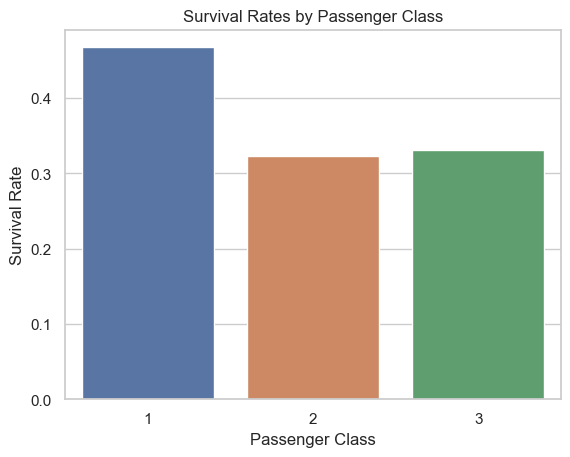

In [51]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Bar Graph for Survival Rates by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=dataset, ci=None)
plt.title('Survival Rates by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

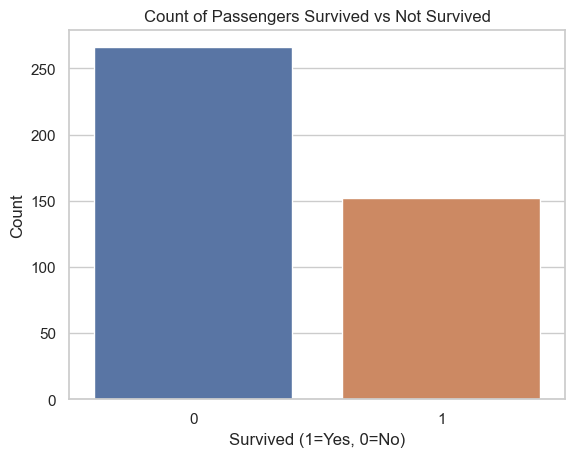

In [50]:
# Count Plot for Number of Passengers Survived or Not
sns.countplot(x='Survived', data=dataset)
plt.title('Count of Passengers Survived vs Not Survived')
plt.xlabel('Survived (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

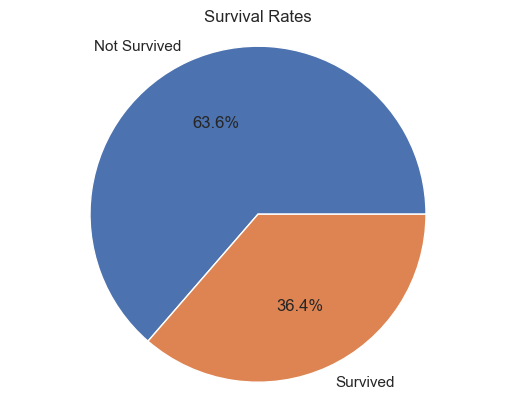

In [49]:
# Pie Chart for Survival Rates
survived_counts = dataset['Survived'].value_counts()
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Rates')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

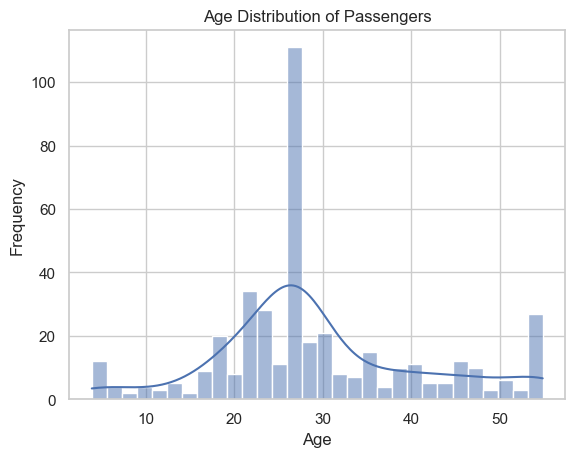

In [52]:
# Histogram for Age Distribution
sns.histplot(dataset['Age_replaced'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

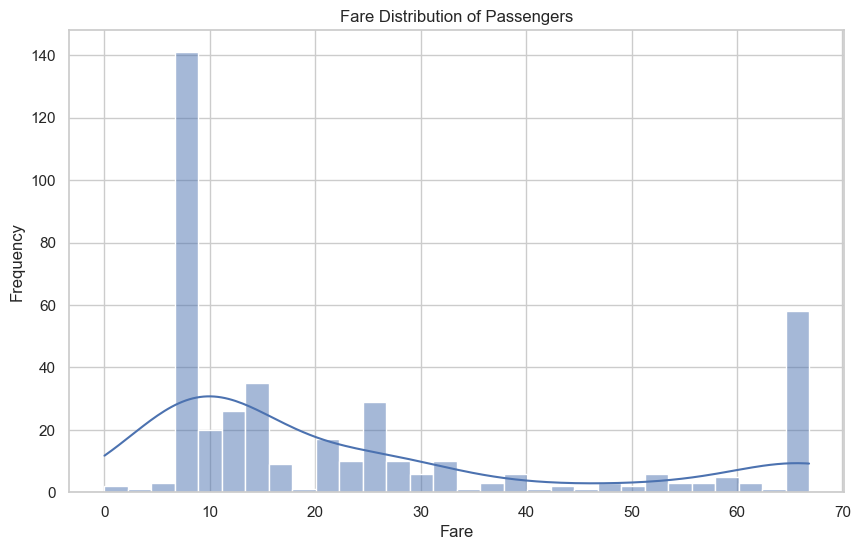

In [53]:
# Histogram for Fare Distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Fare_replaced'], bins=30, kde=True)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

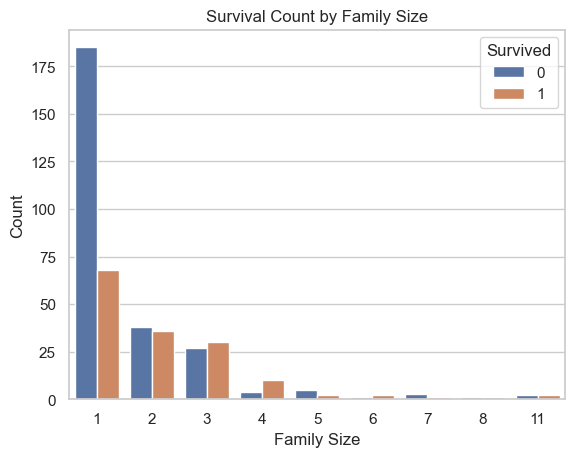

In [47]:
# Countplot for FamilySize
sns.countplot(x='FamilySize', hue='Survived', data=dataset)
plt.title('Survival Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Prepare features and target variable
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()